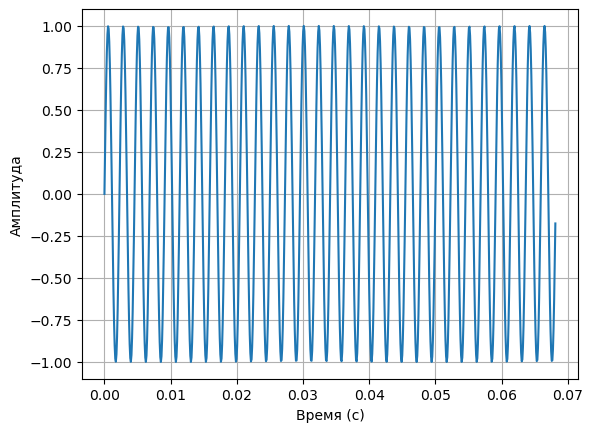

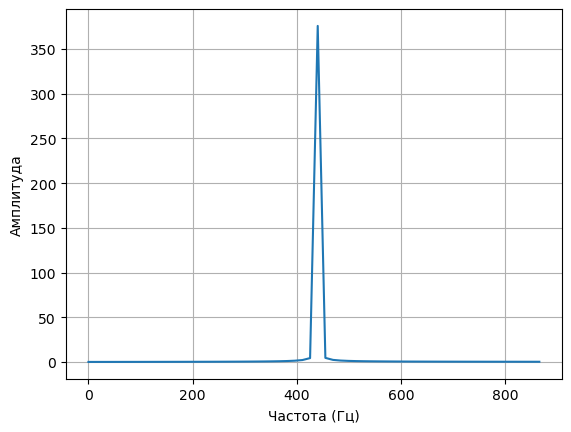

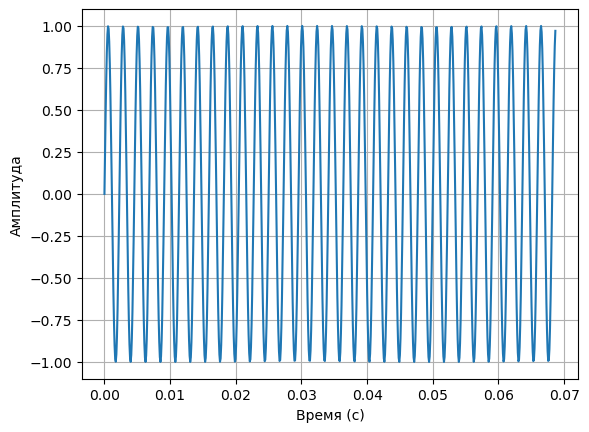

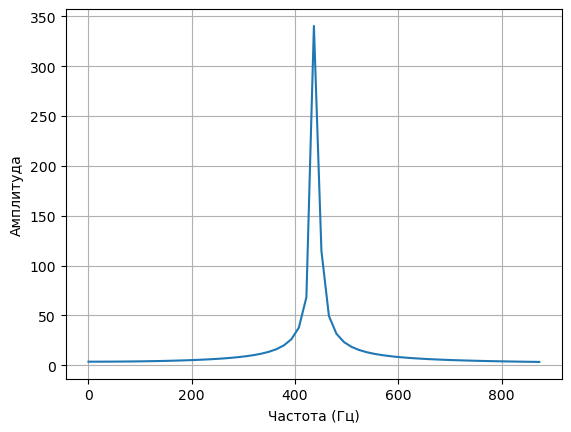

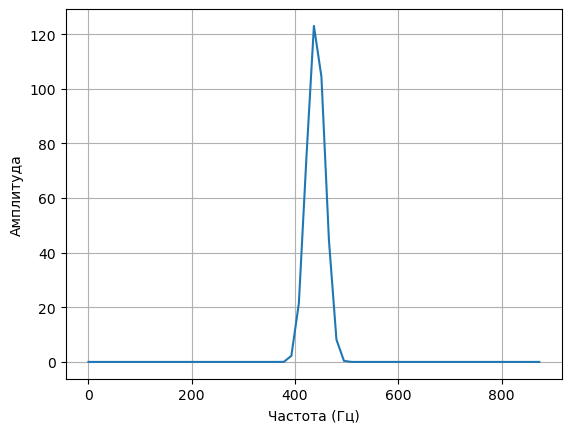

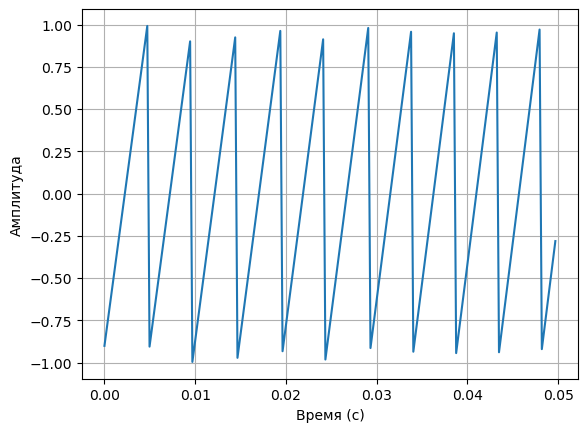

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import SinSignal, ExpoChirp, Chirp, read_wave, PI2, normalize, unbias

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

harmonic_signal = SinSignal(freq=440)
time_span = harmonic_signal.period * 30
audio_wave = harmonic_signal.make_wave(time_span)
audio_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

time_span = harmonic_signal.period * 30.25
audio_wave = harmonic_signal.make_wave(time_span)
audio_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.ys = audio_wave.ys * np.kaiser(len(audio_wave.ys), beta=14)
freq_content = audio_wave.make_spectrum()
freq_content.plot(high=880)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

chirp_signal = SawtoothChirp(start=200, end=500)
chirp_wave = chirp_signal.make_wave(duration=1, framerate=4025)
chirp_wave.segment(start=0, duration=0.05).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_wave.apodize()
chirp_wave.make_audio()

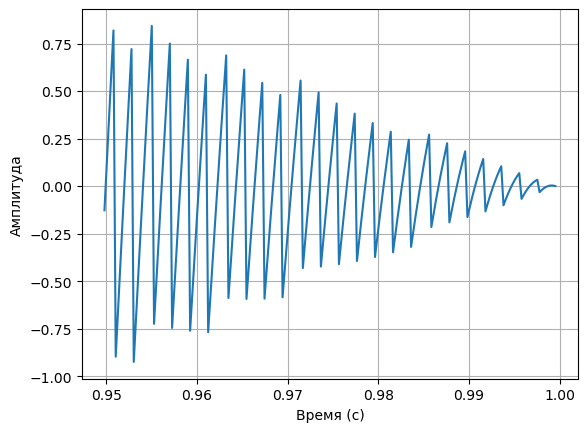

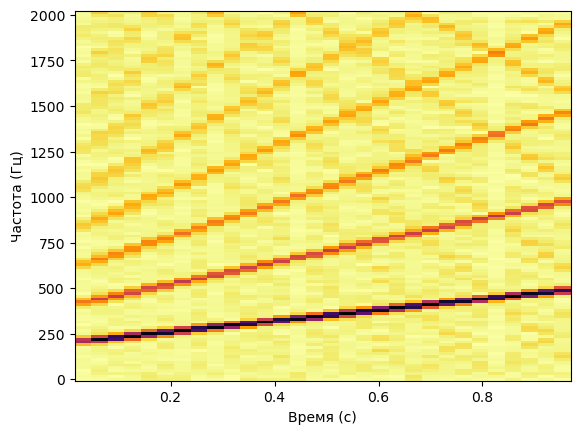

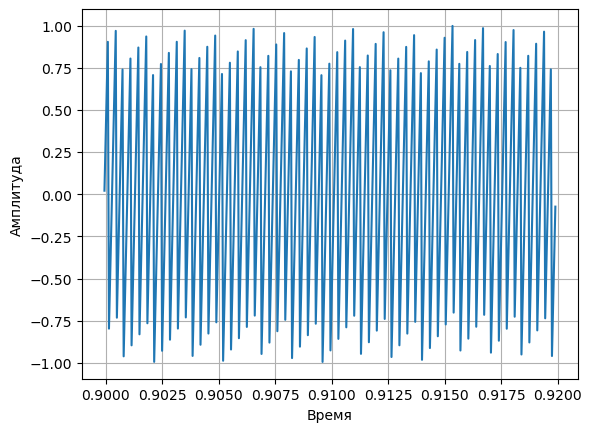

In [2]:
chirp_wave.segment(start=1-0.05, duration=0.05).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_spectrogram = chirp_wave.make_spectrogram(256)
chirp_spectrogram.plot()
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

chirp_signal = SawtoothChirp(start=2500, end=3000)
chirp_wave = chirp_signal.make_wave(duration=1, framerate=20000)
chirp_wave.segment(start=0.9, duration=0.02).plot()
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

chirp_wave.make_audio()

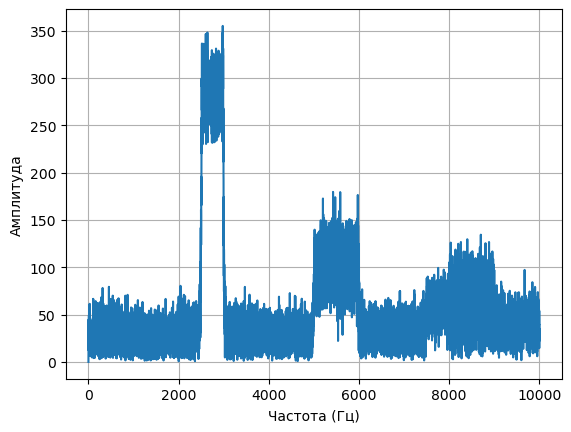

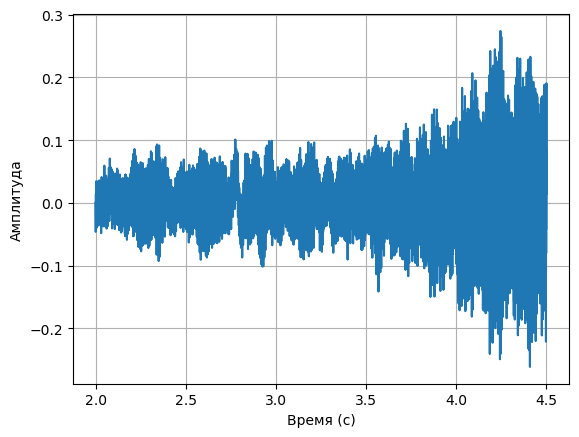

In [3]:
freq_content = chirp_wave.make_spectrum()
freq_content.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave = read_wave('3.1.wav')
wave_part = audio_wave.segment(start=2, duration=2.5)
wave_part.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.make_audio()

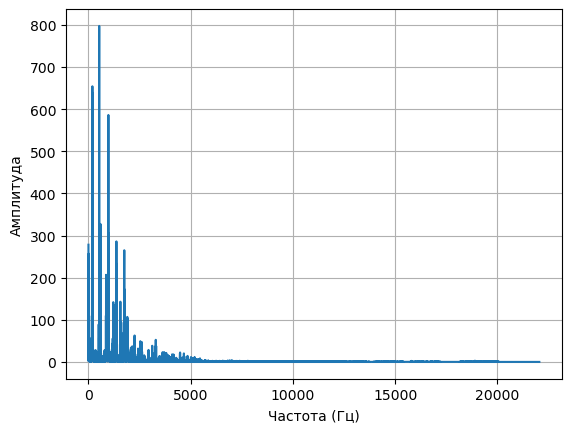

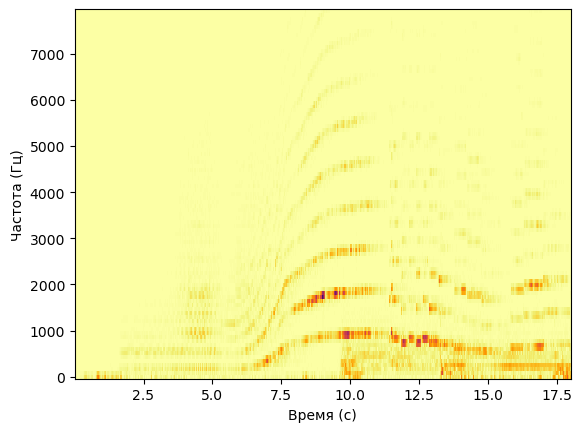

In [4]:
freq_content = wave_part.make_spectrum()
freq_content.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

audio_wave.make_spectrogram(512).plot(high=8000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts) - 1)
        freqs = 1 / lengths
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

trombone_signal = TromboneGliss(262, 349)
first_wave = trombone_signal.make_wave(duration=1)
first_wave.apodize()
first_wave.make_audio()

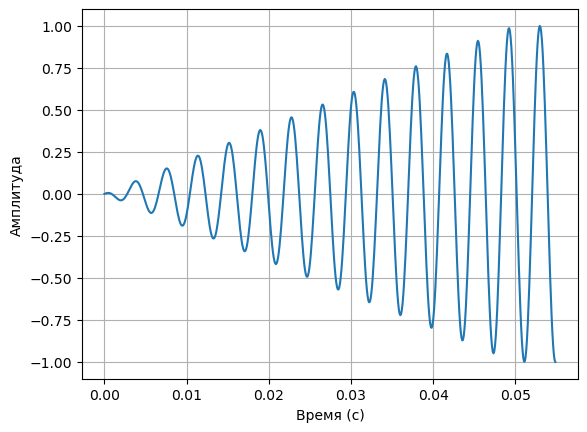

In [5]:
first_wave.segment(start=0, duration=0.055).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

trombone_signal = TromboneGliss(349, 262)
second_wave = trombone_signal.make_wave(duration=1)
second_wave.apodize()
second_wave.make_audio()

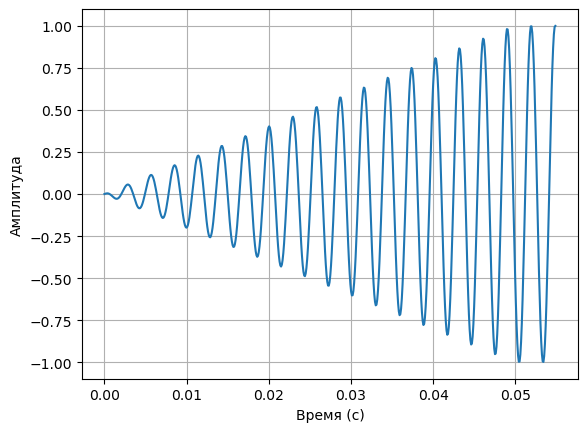

In [6]:
second_wave.segment(start=0, duration=0.0550).plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

combined_wave = first_wave | second_wave
combined_wave.make_audio()

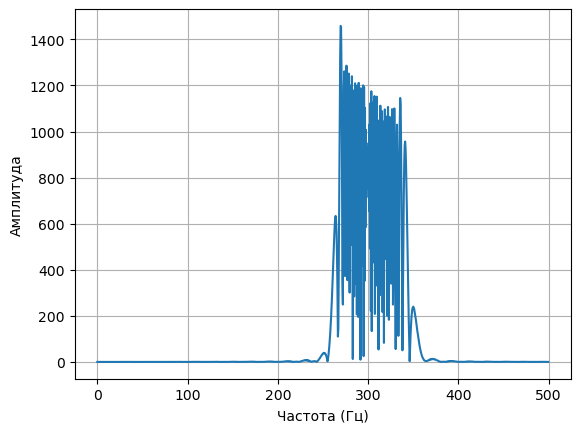

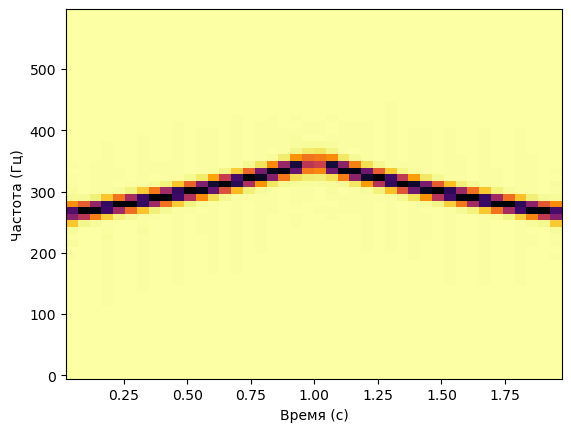

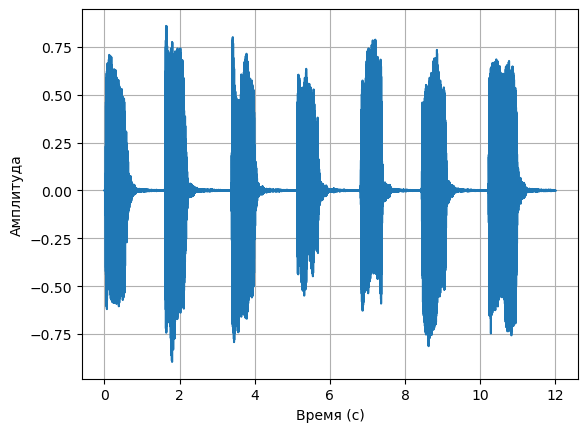

In [7]:
combined_wave.make_spectrum().plot(high=500)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

combined_wave.make_spectrogram(1024).plot(high=600)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()

vowel_wave = read_wave('3.3.wav')
vowel_segment = vowel_wave.segment(start=0, duration=12)
vowel_segment.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

vowel_wave.make_audio()

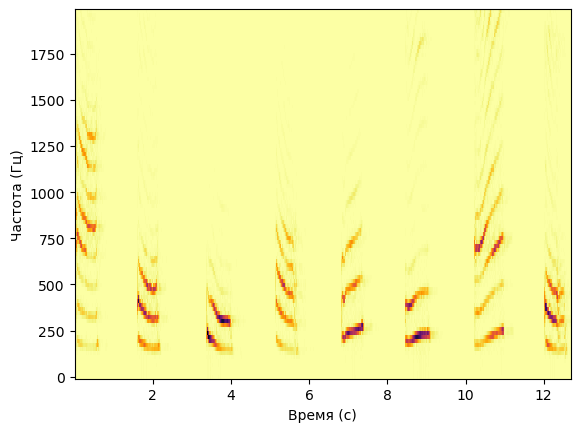

In [8]:
vowel_wave.make_spectrogram(2048).plot(high=2000)
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.show()